## Handwritten Digit Classifier using a Simple Neural Network with 99.4% accuracy

### MNIST Dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. This dataset is considered to be the "hello world" dataset for Computer Vision.

I have written a blog to give a better explanation of the approach I have used, here is the link - https://medium.com/analytics-vidhya/get-started-with-your-first-deep-learning-project-7d989cb13ae5

It has a training set of 60,000 examples and a test set of 10,000 examples for handwritten digits with a fixed dimension of 28X28 pixels. The goal is to correctly identify digits and find ways to improve the performance of the model. So let's dive into it -

## Import the required libraries

In [ ]:
# Requires the latest pip
pip install --upgrade pip

# Current stable release for CPU
pip install tensorflow

# pip install tensorflow=1.6.2

# # Current stable release for GPU (Linux / WSL2)
# pip install tensorflow[and-cuda]

# https://www.tensorflow.org/tutorials/quickstart/beginner

# https://www.tensorflow.org/tutorials/keras/classification
# https://www.tensorflow.org/tutorials/keras/regression


# https://github.com/shahil04/ds_materials/blob/main/9.Deep_learning/class_6_mnist-classifier-first-deep-learning-project.ipynb

##### Download anaconda 
- https://drive.google.com/drive/folders/1ulvp65y0NNjR2ZhXGoecRpWJGPIk-DaC
- https://www.anaconda.com/download
-

###### create a virtual environments

```
    python -m venv myenv
    .\myenv\Scripts\activate
    source myenv/bin/activate
```
###### or use python virtualenv library



- create a class folder -->AI class
- create a folder for project1 inside aiclass folders --> project1

ENV create in conda 
- open cmd 
- go to project path --> cd C:\Users\hp\Documents\ai_class\project1
- create envs
    - conda create -n venvname python=3.12 -y
    - conda activate venvname 
    - install all requeriments library


=================================================
- conda info --envs  --> return all environment name list
- conda list --> show the library list in environments


- CMD 
    - doskey /history
    - cls

In [ ]:

# https://www.kaggle.com/datasets/hojjatk/mnist-dataset/code

In [ ]:
#  work on project 
# 1. experiments  --> notebook -

# 2. productions --> py --> streamlit, flask, fastapi


MNIST stands for the Modified National Institute of Standards and Technology (database/dataset). 
It is a well-known, large collection of handwritten digits (0 through 9) that serves as a standard benchmark for evaluating and comparing machine learning and computer vision algorithms, particularly for image classification

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)
![](https://datasets.activeloop.ai/wp-content/uploads/2022/09/Fashion-MNIST-dataset-Activeloop-Platform-visualization-image.webp)

In [ ]:
# requirements 
!pip install pandas numpy matplotlib tensorflow

# 2nd way  
# create requirements.txt file
#  mentions all library name
#  run in envs --> pip install -r requirement.txt

# freeze all install library
# pip freeze << filename.txt

In [ ]:
# version check 
# np.__version__

In [ ]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from tensorflow.keras.layers import Dense, Dropout, Activation
# from keras.utils import np_utils   
from tensorflow.keras.utils import to_categorical           

### ERROR  --> double click to show error

<!-- The error:

```
ModuleNotFoundError: No module named 'keras.layers.core'
```

means you're trying to import from a module path (`keras.layers.core`) that no longer exists in recent versions of **Keras**.

---

### ✅ **Fix**

In modern versions of Keras (especially with TensorFlow 2.x), you should import layers like this:

```python
from keras.layers import Dense, Dropout, Activation
```

or if you are using **TensorFlow’s built-in Keras** (which is most common now):

```python
from tensorflow.keras.layers import Dense, Dropout, Activation
```

---

### ✅ Recommended Full Import Structure (TensorFlow 2.x)

```python
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
```

---

### 🔁 Replace `np_utils`

If you're getting errors with this line:

```python
from keras.utils import np_utils
```

Use this instead:

```python
from tensorflow.keras.utils import to_categorical
```

And update your label preprocessing like:

```python
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
```

---

Let me know if you'd like a complete working MNIST example using modern Keras/TensorFlow! -->

NumPy is an advanced Math Library in Python. Matplotlib will be used to plot graphs and for data visualization. We will import the MNIST dataset which is pre-loaded in Keras. We will use the Sequential Model and import the basic layers and util tools.

## Load the Dataset


https://keras.io/api/datasets/ 

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/


In [ ]:
# 1. clean data -->already done 
# 2. preprocessing --> already done

# 3. split the data into train test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# if work on own data use sklearn --> train_test_split() functions

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

In [ ]:
X_train[0]

In [ ]:
i = 235  # index number of image data
plt.imshow(X_train[i], cmap='gray', interpolation='none')
print(y_train[i])

In [52]:
# test_data = pd.read_csv('https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project/input?select=test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

We load the dataset and verify the dimensions of the training and testing sets.

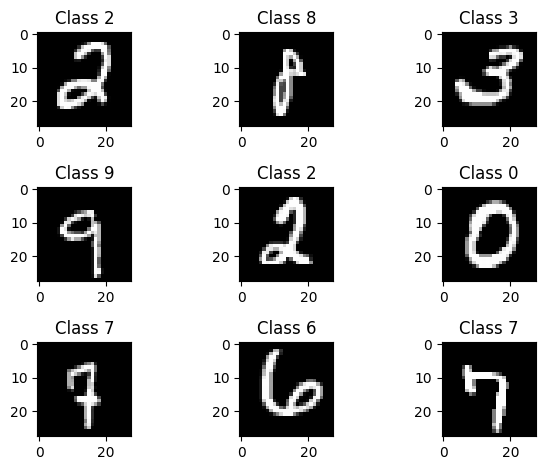

In [10]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Here we are randomly selecting 9 images from the dataset and plotting them to get an idea of the handwritten digits and their respective classes.

## Data Preprocessing

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector. Pixel values range from 0 to 255 where 0 is black and 255 is pure white. We will normalize these values by dividing them by 255 so that we get the output pixel values between [0,1] in the same magnitude.

Note that we are working with grayscale images of dimension 28 x 28 pixels. If we have color images, we have 3 channels for RGB, i.e. 28 x 28 x 3, each with pixel value in the range 0 to 255.

In [ ]:
X_train.shape

In [ ]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

In [17]:
no_classes = 10 # change into OHE 
Y_train = to_categorical(y_train, no_classes)
Y_test = to_categorical(y_test, no_classes)

In [18]:
y_train[0]

np.uint8(5)

In [19]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Since the output will be classified as one of the 10 classes we use one-hot encoding technique to form the output (Y variable). Read more about one-hot encoding here - https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/



## Building a 3-layer Neural Network

![alt text](https://chsasank.github.io/assets/images/crash_course/mnist_net.png)


In [59]:
model = Sequential()

The sequential API allows you to create models layer-by-layer.

## First Hidden Layer

In [ ]:
model.add(Dense(512, input_shape=(784,))) 

The first hidden layer has 512 nodes (neurons) whose input is a vector of size 784. Each node will receive an element from each input vector and apply some weight and bias to it.

In [61]:
model.add(Activation('relu'))

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. ReLU stands for rectified linear unit, and is a type of activation function. $$ ReLU: f(x) = max (0,x)$$

In [62]:
model.add(Dropout(0.2))

Dropout randomly selects a few nodes and nullifies their output (deactivates the node). This helps in ensuring that the model is not overfitted to the training dataset.

In [ ]:
# model = Sequential()
model.add(Dense(512, input_shape=(784,))) 
# model.add(Activation('relu'))
# model.add(Dropout(0.2))

## Second Hidden Layer

In [63]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

The second hidden layer also has 512 nodes and it takes input from the 512 nodes in the previous layer and gives its output to the next subsequent layer.

## Final Output Layer

The final layer of 10 neurons in fully-connected to the previous 512-node layer.
The final layer should be equal to the number of desired output classes.

In [64]:
model.add(Dense(10))
model.add(Activation('softmax'))

The Softmax Activation represents a probability distribution over n different possible outcomes. Its values are all non-negative and sum to 1. For example, if the final output is: [0, 0.94, 0, 0, 0, 0, 0, 0.06, 0, 0] then it is most probable that the image is that of the digit 1

In [65]:
# OR 
# # model is a 3-layer MLP with ReLU and dropout after each layer
# model = Sequential()
# model.add(Dense(hidden_units, input_dim=input_size))
# model.add(Activation('relu'))
# model.add(Dropout(dropout))
# model.add(Dense(hidden_units))
# model.add(Activation('relu'))
# model.add(Dropout(dropout))
# model.add(Dense(num_labels))
# model.add(Activation('softmax'))

In [66]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

## Model Chart

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image
# Image("model_chart.png")


![](https://www.kaggleusercontent.com/kf/39542455/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..niblN5Xoa5Y0fyc0mkgKkA.OrRFpyMR--767E10vjvFt05kgoQjIxKerJ91CUC7S_qa72y5a8-fe8B7T2FeEN5YclVIG37zga7xayW9qqxFB8FrJgcImnxztv0oShS0O60Q5ExcJSo-97DdKPFEfjtgzeXnRHBRJoi-oENjcC-IW0rpbCDOJRZzNlt6EMV_gpxVlcQeqwhwsfPmU4P3eQhiKb3L17KqZySQ9KrtJbRatsKr72Ji7nZt2D8DQFC30rhW9Xuh2W6AwY3Ys7TevWQbP4QPyMJgSHknqXs9umPY3UcvhbLp191j6nyVDWjNZS18TN6huEKUqAEcCP5YPvgIC7U8yKYY9AEl5jAHT69VJhMD6ohfBZDQVvH5UY2Z3r5KjO43ay4UYXEnoGDG1iq-WVVu-ixMF4gROJweG_VwWdvwNeMc1lfCx5SvHJXhWfbgEJALsc_33k2JYzzoIJHf5eYbf4Z0Py4ONkxWvoFWyKDlvdUmVWYjWih6pZAiVWXu_dYz-6-XKH5kh47mSEHxL0BdD1U7-ERUGTOI7LedGxiVa2bIS30Ay4KLM1-czCtM390z03AiZDsP81nhfmhOhPAfzKq3-VzvZCJhlhhWaai2kaBCk2iCwPWvlhah9trlpNXsMTHc2jbuf_HRufXDq1p56EadoLBc5JH7GkNrKvVUhQtiDmkJRX6FU_nG9CQ.KbWroa7pB62MruOAMBmYlA/__results___files/__results___34_0.png)

## Compiling the model

When compiling a model, Keras asks you to specify your loss function and your optimizer.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

The loss function we'll use here is called categorical cross-entropy and is a loss function well-suited to comparing two probability distributions. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. <br><br>
Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the loss function. In our case, we use the Adam Optimizer.

In [69]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.8662 - loss: 0.4438
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9691 - loss: 0.1034
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9786 - loss: 0.0668
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 25ms/step - accuracy: 0.9822 - loss: 0.0554
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9854 - loss: 0.0456
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - accuracy: 0.9872 - loss: 0.0376
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9901 - loss: 0.0320
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9899 - loss: 0.0307
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9919 - loss: 0.0230
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9930 - loss: 0.0208


The batch size determines how much data per step is used to compute the loss function, gradients, and backpropagation. Note that the accuracy increases after every epoch. We need to have a balanced number of epochs as higher epochs come at the risk of overfitting the model to the training set and may result in lower accuracy in the test case.

## Evaluate the model

We will now evaluate our model against the Testing dataset

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

Plot the accuracy and loss metrics of the model.

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [73]:
# Save
model.save("mnist_ann_model.h5")

In [ ]:
# For forntend design
# pip install streamlit
# pip install opencv-python
# pip install streamlit-drawable-canvas

In [ ]:
import streamlit as st
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from streamlit_drawable_canvas import st_canvas

def app():
    # Load model
    model = load_model("mnist_ann_model.h5")

    st.title("MNIST Digit Recognizer")
    st.markdown("Draw a digit below 👇")

    # Canvas for drawing
    canvas_result = st_canvas(
        fill_color="black",
        stroke_width=10,
        stroke_color="white",
        background_color="black",
        height=280,
        width=280,
        drawing_mode="freedraw",
        key="canvas",
    )

    if canvas_result.image_data is not None:
        img = canvas_result.image_data

        # Preprocess the image
        img = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGBA2GRAY)
        img = cv2.resize(img, (28, 28))
        img = img / 255.0
        img = img.reshape(1, 28, 28, 1)

        # Predict
        pred = model.predict(img)
        pred_class = np.argmax(pred)

        st.subheader(f"Predicted Digit: {pred_class}")
app()

2025-04-05 17:02:25.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 17:02:25.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 17:02:25.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 17:02:25.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 17:02:25.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 17:02:25.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 17:02:25.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 17:02:25.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [84]:
!streamlit run app.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


### OPTIONAL NOT NEED TO DO BELOW PART

In [72]:
results = model.predict(test_data)

NameError: name 'test_data' is not defined

In [ ]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

In [ ]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


Now let us introspect a few correctly and wrongly classified images to get a better understanding of where the model fails and hopefully take corrective measures to increse its accuracy.

In [ ]:
predicted_classes = model.predict_classes(X_test)

correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

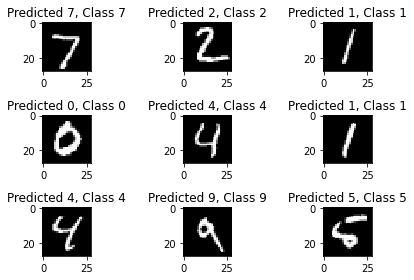

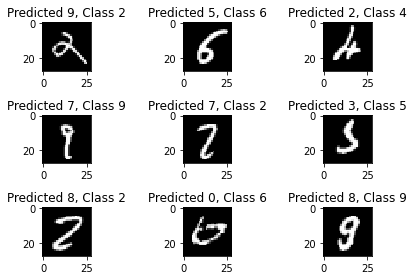

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

Congratulations on completing your first Deep Learning model. I hope you understood the basic concepts behind data pre-processing, model framing, training, and testing.

There are many ways in which we can improve the performance of the model by tuning the hyperparameters, data validation, augmentation, trying different optimizers and avoiding biased training, and many more! 

I have written a blog to give a better explanation of the approach I have used, here is the link - https://medium.com/analytics-vidhya/get-started-with-your-first-deep-learning-project-7d989cb13ae5

Let me know if you have any suggestions/doubts. Happy Kaggling :)